# Tokyo Air Quality: Is it Improving?

The cleanliness of the air should be a concern for everyone, irrespective of where you live in the world. But what is happening in Tokyo? Has air quality improved in recent years? Or are things getting worse?

Let's look at some data. Tokyo Metropolitan Government operate a number of air monitoring stations across the metropolis. They publish the data for everyone to see here: https://www.kankyo.metro.tokyo.lg.jp/air/air_pollution/torikumi/result_measurement.html

I downloaded the Excel spreadsheets for 2011-19 and made a TSV file with the average yearly measurements of the following six air pollutants:
- PM2.5
- suspended particulate matter (SPM)
- nitrogen dioxide (NO<sub>2</sub>)
- sulphur dioxide (SO<sub>2</sub>)
- photochemical oxidants
- carbon monoxide (CO)

Load some modules and import the data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('tokyo_air_quality.tsv', sep='\t', index_col='Year')
data.columns

Index(['NO2_ppb', 'NO2_st', 'SPM_ugm3', 'SPM_st', 'PM25_ugm3', 'PM25_st',
       'OX_ppb', 'OX_st', 'SO2_ppb', 'SO2_st', 'CO_ppb', 'CO_st'],
      dtype='object')

The suffixes in the name of each data column indicate either the measurement unit, or the number of stations used to calculate the average measurement ('_st' columns).

Let's plot the data:

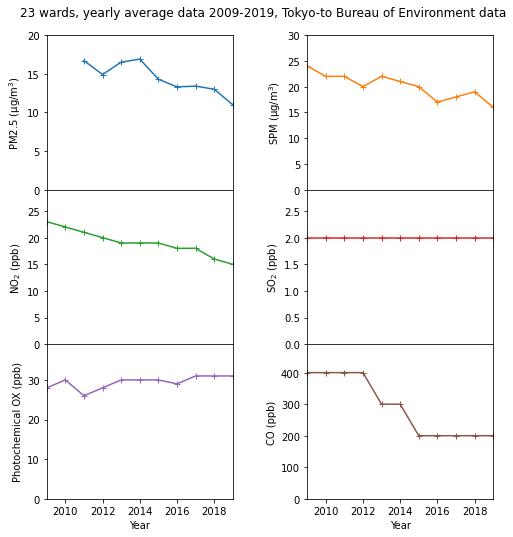

In [2]:
axes = data.plot(y=['PM25_ugm3', 'SPM_ugm3', 'NO2_ppb', 'SO2_ppb', 'OX_ppb', 'CO_ppb'],
          subplots=True,
          layout=(3,2),
          figsize=(8,8),
          marker='+',
          title='23 wards, yearly average data 2009-2019, Tokyo-to Bureau of Environment data',
          legend=False)

# adjust figure spacing, axes limits, and labels
plt.subplots_adjust(top=0.93, hspace=0.0, wspace=0.4)
xlimits=[(2009,2019)]*6
ylimits=[(0,20), (0,30), (0,29), (0,2.9), (0,39), (0,490)]
ylabels=["PM2.5 (μg/m$^3$)",
         "SPM (μg/m$^3$)",
         "NO$_2$ (ppb)",
         "SO$_2$ (ppb)",
         "Photochemical OX (ppb)",
         "CO (ppb)"]
k = 0
for i in range(0,len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlim(xlimits[k])
        axes[i][j].set_ylim(ylimits[k])
        axes[i][j].set_ylabel(ylabels[k])
        k+=1

# save the figure as a PNG image file
fig = plt.gcf()
fig.savefig('tokyo_air_quality.png', dpi=150, transparent=False, facecolor='white')

As we can see, levels are trending downwards for the following four pollutants: PM2.5, SPM, NO<sub>2</sub> & CO. For the other two pollutants, SO<sub>2</sub> levels were flat, while photochemical oxidants trended slightly upwards between 2009 and 2019. Generally speaking the results are good news: air quality in Tokyo improved over the last decade.

Here are some useful resources I found on the subject:
- Paper on the long term air pollution trends in Japan between 1970 and 2012: https://www.researchgate.net/publication/264171197
- Interesting presentation on the main causes of the air pollution and what the government (both National and the Prefecture) are doing to tackle it: http://www.econ.ryukoku.ac.jp/~tlee/seminar-8.files/G4-%E6%9D%B1%E4%BA%AC%E9%83%BD%E3%81%AE%E5%A4%A7%E6%B0%97%E6%B1%9A%E6%9F%93-V4.pdf

It will be interesting to follow what happens in coming years. Will air quality in Tokyo continue to improve? Or will it flatline at some point?